Day3„ÄÄver1.2

+ Day2„Å´Á∂ö„ÅçÂêÑÁ®Æ„ÅÆÁï∞Â∏∏Ê§úÂá∫ÊâãÊ≥ï„ÇíÈÅ©Áî®„Åó„ÄÅÊ∞óÊ∏©„ÄÅÈ¢®ÈÄü„ÄÅÂÖ®Â§©Êó•Â∞ÑÈáè„ÄÅÊπøÂ∫¶„ÇíË®àÊ∏¨ÂèØËÉΩ„Å™„Éá„Éº„Çø„Å®„Åó„ÄÅÂü∫Êú¨ÁöÑ„Å™ÊâãÊ≥ï„ÇíÁî®„ÅÑ„Å¶Êó•Â∞ÑÁóÖ‰∫àÈò≤„Å®„Å™„Çã„Çà„ÅÜ„Å™Áï∞Â∏∏Ê∞óË±°„ÇíÊ§úÂá∫„Åô„Çã„ÄÇ

+ „Éá„Éº„Çø„ÅÆÊÄßË≥™‰∏äÊâãÊ≥ï„ÅåÊúÄÈÅ©„Åß„Å™„ÅÑÂ†¥Âêà„ÇÇÂê´„ÇÅ„Åæ„Åö„ÅØÂêÑÁ®Æ„ÅÆÁï∞Â∏∏Ê§úÂá∫ÊâãÊ≥ï„ÇíÂÆüË∑µ„Åô„Çã„ÄÇ

# Ê∑∑ÂêàÊ≠£Ë¶èÂàÜÂ∏É

* Á¢∫ÁéáÂØÜÂ∫¶Èñ¢Êï∞  
$\displaystyle f({\boldsymbol \mu},{\Sigma}  )=\frac{1}{(\sqrt{2 \pi })^p \sqrt{\left| \Sigma \right| }}exp\left(-\frac{1}{2}\left({\boldsymbol x}  -{\boldsymbol \mu} \right)^T\Sigma^{-1}\left({\boldsymbol x} - {\boldsymbol \mu} \right) \right)$  
$\Sigma$:ÂÖ±ÂàÜÊï£Ë°åÂàó  
$\left| \Sigma \right| $:ÂÖ±ÂàÜÊï£Ë°åÂàó„ÅÆË°åÂàóÂºè  
$p$:Ê¨°ÂÖÉÊï∞
  
  
* Â§öÂ§âÈáèÊ≠£Ë¶èÂàÜÂ∏É„ÅÆ„Éë„É©„É°„Éº„Çø${\boldsymbol \mu}, \Sigma$„ÇíÊúÄÂ∞§Êé®ÂÆö„Å´„Çà„Å£„Å¶Ê±Ç„ÇÅ„ÇãÊñπÊ≥ï  
$\displaystyle \hat{\boldsymbol  \mu}=\frac{1}{N}\sum_{n=1}^{N} x^{(n)}$  
$\displaystyle \hat{\Sigma}=\frac{1}{N}\sum_{n=1}^{N} ({\boldsymbol x}^{(n)}-\hat{\boldsymbol \mu})({\boldsymbol x}^{(n)}-\hat{\boldsymbol  \mu})^T$  
$\hat {\boldsymbol \mu}$ : Âπ≥Âùá„ÅÆÊúÄÂ∞§Ëß£  
$\hat \Sigma$ : Ê®ôÊ∫ñÂÅèÂ∑Æ„ÅÆÊúÄÂ∞§Ëß£    

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
#from pandas.plotting import scatter_matrix

import statsmodels.api as sm  #ARMA„Åß‰∫àÊ∏¨„Åô„ÇãÈöõ„Å´Áî®„ÅÑ„Çã„É©„Ç§„Éñ„É©„É™
from scipy.ndimage.interpolation import shift  #numpy„ÅÆÈÖçÂàó„Çíshift„Åô„Çã„Åü„ÇÅ„ÅÆÈñ¢Êï∞
import scipy
%matplotlib inline

## data loading 2017

In [2]:
df2017 = pd.read_excel('data/hot/zenkoku2017.xlsx', sheet_name='Sheet1')
df7n = df2017[df2017['place'] == 'nagoya']
ta = df7n["temp"]
ws = df7n["wind_speed"]
sr = df7n["solar_radiation"]
rh = df7n["relative_humidity"]

## Wet Bulb Globe Temperature:ÊπøÁêÉÈªíÁêÉÊ∏©Â∫¶

In [3]:
wbgt = 0.735 * ta + 0.0374 * rh + 0.00292 * ta * rh + 7.619 * sr - 4.557 * sr**2 - 0.0572 * ws - 4.064
wbgt = pd.DataFrame(wbgt, columns=["wbgt"])
df7nw = pd.concat([df7n, wbgt], axis=1)
data2 = df7nw["wbgt"].values

## data 2017_all (4data with wbgt)_ @nagoya

In [4]:
# 2017_all (4data with wbgt)_ @nagoya
# N = 2208

df7nw.describe()

temp   wind_speed  solar_radiation  relative_humidity  \
count  2208.000000  2208.000000      2208.000000        2208.000000   
mean     26.643886     2.805525         0.690675          69.479167   
std       3.510730     1.594632         0.939578          15.122952   
min      13.200000     0.100000         0.000000          24.000000   
25%      24.600000     1.700000         0.000000          58.000000   
50%      26.700000     2.500000         0.110000          70.000000   
75%      29.000000     3.700000         1.260000          81.000000   
max      35.200000    15.400000         3.660000          96.000000   

              wbgt  
count  2208.000000  
mean     22.360849  
std       5.483527  
min      -9.083837  
25%      20.231814  
50%      23.870001  
75%      25.628427  
max      31.010760

## EM method

EM (Expectation Maximization)„Ç¢„É´„Ç≥„Çô„É™„Çπ„Çô„É†„Å¶„Çô„ÅØ„ÄÅE„Çπ„ÉÜ„ÉÉ„Éï„Çö„Å®M„Çπ„ÉÜ„ÉÉ„Éï„Çö„Çí ‰∫§‰∫í„Å´Ë®àÁÆó

‚ë†E„Çπ„ÉÜ„ÉÉ„Éï„Çö(ÊúüÂæÖÂÄ§ÁÆóÂá∫)

    ÂêÑÊ≠£Ë¶èÂàÜÂ∏É„ÅÆŒº„ÄÅœÉ^2„Å®Ê∑∑ÂêàÁéáœÄ„ÇíÂõ∫ÂÆö„ÅóÂêÑÊ≠£Ë¶èÂàÜÂ∏É„Å´Â±û„Åô„ÇãÁ¢∫Áéá(Â∏∞Â±ûÂ∫¶q)„ÇíÁÆóÂá∫

‚ë°M„Çπ„ÉÜ„ÉÉ„Éï„Çö(ÊúüÂæÖÂÄ§ÊúÄÂ§ßÂåñ„ÅÆ„Åü„ÇÅ„ÅÆÊÉÖÂ†±Êõ¥Êñ∞)

    Â∏∞Â±ûÂ∫¶q„ÇíÂõ∫ÂÆö„Åó„ÄÅÂ∞§Â∫¶„ÇíÊúÄÂ§ß„Å´„Åô„ÇãÂêÑÊ≠£Ë¶èÂàÜÂ∏É„ÅÆŒº„ÄÅœÉ^2„Å®Ê∑∑ÂêàÁéáœÄ„ÇíÊ±Ç„ÇÅ„Çã

    ÂêÑÊ≠£Ë¶èÂàÜÂ∏É„Å´„Å§„ÅÑ„Å¶„ÄÅÂ∏∞Â±ûÂ∫¶„ÅÆÂπ≥Âùá„ÇíÊ±Ç„ÇÅ„Åù„Çå„ÇíÊ∑∑ÂêàÁéá„Å®„Åô„Çã

    Â∏∞Â±ûÂ∫¶q„Å¶„ÇôÈáç„Åø‰ªò„Åë„Åó„ÅüŒº„ÇíÁÆóÂá∫

    Â∏∞Â±ûÂ∫¶q„Å¶„ÇôÈáç„Åø‰ªò„Åë„Åó„ÅüœÉ^2„ÇíÁÆóÂá∫

In [5]:
# EMÊ≥ïÔºàExpectation Maximization)

#Âπ≥Âùám, ÂàÜÊï£v„ÅÆ„Ç¨„Ç¶„ÇπÂàÜÂ∏É
def gaussian(x, m, v):
    p = math.exp(-pow(x - m, 2) / (2 * v)) / math.sqrt(2 * math.pi * v)
    return p

#E„Çπ„ÉÜ„ÉÉ„Éó
def e_step(xs, ms, vs, p):
    burden_rates = []
    for x in xs:
        d = (1 - p) * gaussian(x, ms[0], vs[0]) + p * gaussian(x, ms[1], vs[1])
        n = p * gaussian(x, ms[1], vs[1])
        burden_rate = n / d
        burden_rates.append(burden_rate)
    return burden_rates

#M„Çπ„ÉÜ„ÉÉ„Éó
def m_step(xs, burden_rates):
    d = sum([1 - r for r in burden_rates])
    n = sum([(1 - r) * x for x, r in zip(xs, burden_rates)])
    mu1 = n / d

    n = sum([(1 - r) * pow(x - mu1, 2) for x, r in zip(xs, burden_rates)])
    var1 = n / d

    d = sum(burden_rates)
    n = sum([r * x for x, r in zip(xs, burden_rates)])
    mu2 = n / d

    n = sum(r * pow(x - mu2, 2) for x, r in zip(xs, burden_rates))
    var2 = n / d

    N = len(xs)
    p = sum(burden_rates) / N

    return [mu1, mu2], [var1, var2], p


#ÂØæÊï∞Â∞§Â∫¶Èñ¢Êï∞
def calc_log_likelihood(xs, ms, vs, p):
    s = 0
    for x in xs:
        g1 = gaussian(x, ms[0], vs[0])
        g2 = gaussian(x, ms[1], vs[1])
        s += math.log((1 - p) * g1 + p * g2)
    return s


## plot all wbgt

mu1 :  14.88734831916789
v1 :  24.129427138948586
v2 :  52.383167870420294
p :  8.426330546368435


/Users/peasucrivafie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


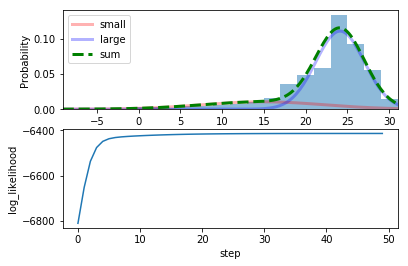

In [8]:
#mu, vs, p„ÅÆÂàùÊúüÂÄ§„ÇíË®≠ÂÆö„Åô„Çã
p = 0.5
ms = [random.choice(data2), random.choice(data2)]
vs = [np.var(data2), np.var(data2)]
T = 50  #ÂèçÂæ©ÂõûÊï∞
ls = []  #ÂØæÊï∞Â∞§Â∫¶Èñ¢Êï∞„ÅÆË®àÁÆóÁµêÊûú„Çí‰øùÂ≠ò

#EM„Ç¢„É´„Ç¥„É™„Ç∫„É†
for t in range(T):
    burden_rates = e_step(data2, ms, vs, p)
    ms, vs, p = m_step(data2, burden_rates)
    ls.append(calc_log_likelihood(data2, ms, vs, p))

print("mu1 : ", ms[0])
print("v1 : ", ms[1])
print("v2 : ", vs[0])
print("p : ", vs[1])

plt.subplot(211)
xs = np.linspace(min(data2), max(data2), 200)
norm1 = scipy.stats.norm.pdf(xs, ms[0], math.sqrt(vs[0]))
norm2 = scipy.stats.norm.pdf(xs, ms[1], math.sqrt(vs[1]))
plt.hist(data2, bins=20, normed=True, alpha=0.5) # density or normed

plt.plot(xs, (1 - p) * norm1, color="red", lw=3, alpha=0.3)
plt.plot(xs, p * norm2, color="blue", lw=3, alpha=0.3)
plt.plot(
    xs, (1 - p) * norm1 + p * norm2, color="green", lw=3, linestyle='dashed')

plt.xlim(min(data2), max(data2))
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(["small", "large", "sum"])

plt.subplot(212)
plt.plot(np.arange(len(ls)), ls)
plt.xlabel("step")
plt.ylabel("log_likelihood")
plt.show()

„Åì„Åì„Åß„ÅØÂ∞ëÊï∞Ê¥æ„ÅÆË£æ„ÅÆÂ∫É„ÅÑÂ±±(small)„ÇíÁï∞Â∏∏„Å®Êâ±„ÅÑ„ÄÅwbgt=18‰ª•‰∏ä„ÇíÊ≠£Â∏∏„Å®„Åô„Çã

## separate small and large

In [9]:
# data 
# 2017_normal (4data with wbgt)_ @nagoya
# N = 1891

df7nw_cut = df7nw[df7nw.wbgt>18] 
df7nw_cut.describe()

temp   wind_speed  solar_radiation  relative_humidity  \
count  1891.000000  1891.000000      1891.000000        1891.000000   
mean     26.613273     2.714225         0.486388          72.182972   
std       3.053120     1.585811         0.678913          13.745739   
min      18.200000     0.100000         0.000000          29.000000   
25%      24.700000     1.600000         0.000000          62.000000   
50%      26.600000     2.400000         0.040000          73.000000   
75%      28.500000     3.500000         0.880000          83.000000   
max      34.800000    15.400000         2.450000          96.000000   

              wbgt  
count  1891.000000  
mean     24.116910  
std       2.838067  
min      18.004528  
25%      22.302963  
50%      24.388954  
75%      25.972860  
max      31.010760

## plot normal data (temp & humidity)

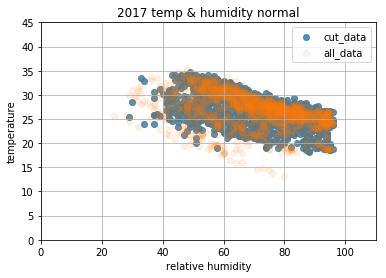

In [10]:
# Ê≠£Â∏∏ÂÄ§„ÇíÔºíÊ¨°ÂÖÉÔºàÊ∞óÊ∏©„ÄÅÊπøÂ∫¶Ôºâ„Åß„Éó„É≠„ÉÉ„Éà

# normal label
y = np.array([0] * 1891)

# cut data = normal data
plt.scatter(df7nw_cut["relative_humidity"], df7nw_cut["temp"], alpha=0.8)

# all data
plt.scatter(df7n["relative_humidity"], df7n["temp"], alpha=0.1)

plt.title("2017 temp & humidity normal")
plt.grid()
plt.xlim([0, 110])
plt.ylim([0, 45])
plt.legend(['cut_data', 'all_data'])
plt.xlabel("relative humidity")
plt.ylabel("temperature")

plt.show()

In [11]:
# data 
# 2017_normal (humidity , temp)_ @nagoya

muhat = df7nw_cut[["relative_humidity", "temp"]].mean().values
X = df7nw_cut[["relative_humidity", "temp"]].values

In [12]:
li = 0
for i in range(1891):
    li += np.dot((X[i, :] - muhat).reshape(2, 1), (X[i, :] - muhat).reshape(
        1, 2))
sigmahat = li / 1891

for i in range(muhat.size):
    print('muhat ', i, ' : ', muhat[i])
print()
for i, item in np.ndenumerate(sigmahat):
    print('musigma ', i, ' : ', item)


muhat  0  :  72.18297197250132
muhat  1  :  26.613273400317357

musigma  (0, 0)  :  188.845421310161
musigma  (0, 1)  :  -21.246056370444066
musigma  (1, 0)  :  -21.246056370444066
musigma  (1, 1)  :  9.316613875014294


## plot contour

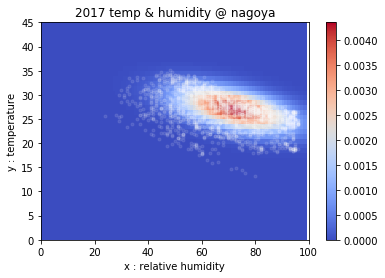

In [13]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from pylab import *  #„Ç≥„É≥„ÇøÊèèÁîªÁî®


def f(x, y):
    det = np.linalg.det(sigma)
    if det < 0:
        sys.exit()
    inv_sigma = np.linalg.inv(sigma)
    x_c = np.array([x, y]) - mu

    return 1 / (2 * np.pi * np.sqrt(det)) * np.exp(
        -x_c.dot(inv_sigma).dot(x_c.T) / 2.0)


x = y = np.arange(0, 100, 1)

X, Y = np.meshgrid(x, y)

mu = muhat
sigma = sigmahat
Z = np.vectorize(f)(X, Y)

plt.pcolor(X, Y, Z, cmap=cm.coolwarm)
plt.colorbar()

plt.xlim([0, 100])
plt.ylim([0, 45])

plt.xlabel("x : relative humidity")
plt.ylabel("y : temperature")

# 2017_normal (humidity , temp)_ @nagoya
plt.plot(
    df7n["relative_humidity"],
    df7n["temp"],
    ls="",
    marker="o",
    color="white",
    alpha=0.1,
    markersize=3)
plt.title("2017 temp & humidity @ nagoya")
plt.show()

# ËøëÂÇçÊ≥ï
ÔºàÂÖ•Âäõ„ÅÆ„Åø„ÄÄÔºÜ„ÄÄÊôÇÁ≥ªÂàóÔºãÊôÇÁ≥ªÂàó‰ª•Â§ñÔºâ

‚Ä¢ kËøëÂÇçÊ≥ï„ÅØ„ÄÅ‰∏ÄËà¨ÁöÑ„Å´„ÄÅÊïôÂ∏´„ÅÇ„ÇäÂ≠¶Áøí„Ç¢„É´„Ç≥„Çô„É™„Çπ„Çô„É†„Å®„Åó„Å¶Áî®„ÅÑ„Çâ„Çå„Çã

‚Ä¢ ÊïôÂ∏´„ÅÇ„Çä„Ç¢„É´„Ç≥„Çô„É™„Çπ„Çô„É†„Å®„Åó„Å¶„ÅÆkËøëÂÇçÊ≥ï

‚Ä¢ Êñ∞„Åó„ÅÑË¶≥Ê∏¨ÁÇπ„Åã„ÇôÂæó„Çâ„Çå„Åü„Çâ„ÄÅ„Åù„Çå„Çí‰∏≠ÂøÉ„Å®„Åó„Å¶kÂÄã„ÅÆÊó¢Áü•„ÉÜ„Çô„Éº„Çø„ÇíÂê´„ÇÄÂÜÜ„ÇíÊèè„Åè

‚Ä¢ ÂõûÂ∏∞ÂïèÈ°å„Å¶„Çô„ÅÇ„Çå„ÅØ„Çô„Åù„Çå„Çâ„ÅÆÂπ≥Âùá(ÂàÜÈ°ûÂïèÈ°å„Å¶„Çô„ÅÇ„Çå„ÅØ„ÇôÊúÄÈ†ª„É©„Éò„Çô„É´)„ÇíË®àÁÆó„Åó„ÄÅ„Åù„ÅÆÁµê Êûú„ÇíÊñ∞„Åó„ÅÑË¶≥Ê∏¨ÁÇπ„ÅÆ‰∫àÊ∏¨ÂÄ§„Å´„Åô„Çã

## kÂü∫Ê∫ñ

* ùëòÂü∫Ê∫ñ
    * „Å™„Çì„Çâ„Åã„ÅÆÊñπÊ≥ï„ÅßÈÅ©Âàá„Å™$ùúÄ$„ÇíÊ±∫„ÇÅ„Çã
    * ËøëÂÇçÊï∞„ÅÆÈñæÂÄ§$ùëò_{ùë°‚Ñé}$„ÇíÊ±∫„ÇÅ„Çã
    * Êñ∞„Åü„Å™Ë¶≥Ê∏¨ÂÄ§$ùë•‚Ä≤$„Å´ÂØæ„Åó„Å¶„ÄÅÂçäÂæÑùúÄ„ÅÆÁØÑÂõ≤„Å´ÂÖ•„ÇãÊ®ôÊú¨„Çí$ùê∑$„Åã„ÇâÈÅ∏„Å∂
    * „Åù„ÅÆÊ®ôÊú¨„ÅÆÊï∞ùëò„ÅåÈñæÂÄ§$ùëò_{ùë°‚Ñé}$„Çí‰∏ãÂõû„Å£„Åü„Çâ$ùë•‚Ä≤$„ÅØÁï∞Â∏∏„Åß„ÅÇ„Çã„Å®Âà§ÂÆö„Åô„Çã

In [108]:
# df7nw_cut = 2017_ normal (4data with wbgt) _ N = 1891_ @nagoya
# X = 2017_ normal (temp & humidity) _ N = 1891_ @nagoya

X= df7nw_cut[["relative_humidity","temp"]].values
y=[0]*1891

In [109]:
# df8nw = 2018 _ all (4data with wbgt) _ N = 2208 _ @nagoya
# X_new =  2018 _ all (emp & humidity) _ N = 2208 _ @nagoya -> 2208

df2018 = pd.read_excel('data/hot/zenkoku2018.xlsx', sheet_name='Sheet1')
df8n=df2018[df2018['place']=='nagoya']
ta = df8n["temp"]
ws = df8n["wind_speed"]
sr = df8n["solar_radiation"]
rh = df8n["relative_humidity"]

wbgt = 0.735 * ta + 0.0374 * rh + 0.00292 * ta * rh + 7.619 * sr - 4.557 * sr**2 - 0.0572 * ws - 4.064
wbgt = pd.DataFrame(wbgt, columns=["wbgt"])
df8nw = pd.concat([df7n,wbgt],axis=1)

X_new = np.zeros((2208,2))
for i in range(2208):
    X_new[i][0]=df8nw["relative_humidity"].iloc[i]
    X_new[i][1]=df8nw["temp"].iloc[i]

## ËøëÂÇçÊï∞ kth=3

In [198]:
from sklearn.neighbors import RadiusNeighborsClassifier

epsilon = 5  #„ÄÄÂçäÂæÑ
k_th = 3  # ÈñæÂÄ§(ËøëÂÇçÁÇπ„ÅÆÂÄãÊï∞)

rneigh = RadiusNeighborsClassifier(radius=epsilon)
rneigh.fit(X , y)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=5,
             weights='uniform')

In [199]:
#Âà§ÂÆö
j = 0
anomaly_idx_k1 = []
dist, ind = rneigh.radius_neighbors(X_new, radius=epsilon)
np.set_printoptions(precision=2)

for d in dist:
    j = j + 1
    if len(d) < k_th:
        anomaly_idx_k1.append(j)
        print("Anomaly No = ", j, " / Dist to Neigh = ",d)
        if j >= X_new.shape[0]-1:
            break
    else:
        pass

Anomaly No =  1550  / Dist to Neigh =  [1.8 4.6]
Anomaly No =  2080  / Dist to Neigh =  [0.   3.26]
Anomaly No =  2160  / Dist to Neigh =  [4.66 4.61]
Anomaly No =  2161  / Dist to Neigh =  []
Anomaly No =  2162  / Dist to Neigh =  [4.22 4.51]
Anomaly No =  2163  / Dist to Neigh =  [4.61 4.9 ]
Anomaly No =  2164  / Dist to Neigh =  []
Anomaly No =  2165  / Dist to Neigh =  []
Anomaly No =  2166  / Dist to Neigh =  []
Anomaly No =  2167  / Dist to Neigh =  []
Anomaly No =  2171  / Dist to Neigh =  [3.61 2.06]
Anomaly No =  2196  / Dist to Neigh =  [4.03 0.8 ]
Anomaly No =  2197  / Dist to Neigh =  []
Anomaly No =  2199  / Dist to Neigh =  [3.28 1.12]
Anomaly No =  2200  / Dist to Neigh =  [3.26 0.  ]


In [200]:
len(anomaly_idx_k1)

15

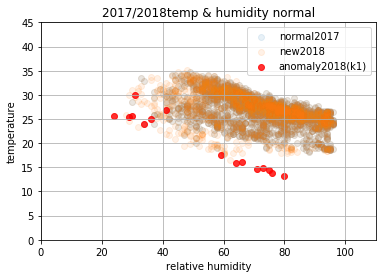

In [201]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.1)
plt.scatter(X_new[anomaly_idx_k1, 0], X_new[anomaly_idx_k1, 1], alpha=0.8,c='red')
plt.title("2017/2018temp & humidity normal")

plt.grid()
plt.xlim([0, 110])
plt.ylim([0, 45])
plt.legend(['normal2017','new2018','anomaly2018(k1)'])
plt.xlabel("relative humidity")
plt.ylabel("temperature")

plt.show()

## ËøëÂÇçÊï∞ kth=10

In [202]:
from sklearn.neighbors import RadiusNeighborsClassifier

epsilon = 5  #„ÄÄÂçäÂæÑ
k_th = 10  # ÈñæÂÄ§(ËøëÂÇçÁÇπ„ÅÆÂÄãÊï∞)

rneigh = RadiusNeighborsClassifier(radius=epsilon)
rneigh.fit(X , y)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=5,
             weights='uniform')

In [203]:
#Âà§ÂÆö
j = 0
anomaly_idx_k2=[]
dist, ind = rneigh.radius_neighbors(X_new, radius=epsilon)
np.set_printoptions(precision=2)

for d in dist:
    j = j + 1
    if len(d) < k_th:
        anomaly_idx_k2.append(j)
        print("Anomaly No = ", j, " / Dist to Neigh = ",d)
        if j >= X_new.shape[0]-1:
            break
    else:
        pass

Anomaly No =  156  / Dist to Neigh =  [1.5  4.53 1.35 4.21 4.72]
Anomaly No =  157  / Dist to Neigh =  [3.01 2.02 2.69 3.83 3.55 4.94]
Anomaly No =  159  / Dist to Neigh =  [3.01 2.15 3.16 4.32 3.84]
Anomaly No =  160  / Dist to Neigh =  [0.   1.17 4.88]
Anomaly No =  161  / Dist to Neigh =  [1.17 0.   3.72 4.53]
Anomaly No =  1500  / Dist to Neigh =  [3.2  3.45 2.79 4.02 4.08]
Anomaly No =  1501  / Dist to Neigh =  [2.88 2.97 2.9 ]
Anomaly No =  1502  / Dist to Neigh =  [3.78 2.6  4.35]
Anomaly No =  1503  / Dist to Neigh =  [2.24 3.52 2.44]
Anomaly No =  1548  / Dist to Neigh =  [4.71 4.01 4.9  4.   3.5  3.06 4.24 4.24 4.88]
Anomaly No =  1549  / Dist to Neigh =  [4.38 1.41 4.56 4.46]
Anomaly No =  1550  / Dist to Neigh =  [1.8 4.6]
Anomaly No =  1551  / Dist to Neigh =  [4.03 1.72 4.92 4.17]
Anomaly No =  2078  / Dist to Neigh =  [3.03 4.83 4.32 4.81 4.72 4.21 4.61 4.61]
Anomaly No =  2079  / Dist to Neigh =  [4.81 2.01 4.46 4.56]
Anomaly No =  2080  / Dist to Neigh =  [0.   3.26]
A

In [204]:
len(anomaly_idx_k2)

40

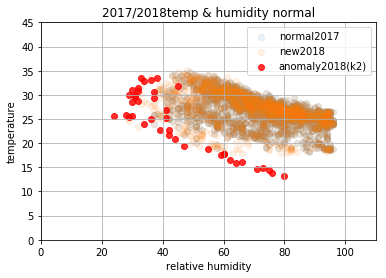

In [205]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.1)
plt.scatter(X_new[anomaly_idx_k2, 0], X_new[anomaly_idx_k2, 1], alpha=0.8,c='red')
plt.title("2017/2018temp & humidity normal")

plt.grid()
plt.xlim([0, 110])
plt.ylim([0, 45])
plt.legend(['normal2017','new2018','anomaly2018(k2)'])
plt.xlabel("relative humidity")
plt.ylabel("temperature")

plt.show()

ËøëÂÇçÊï∞„ÅÆÈñæÂÄ§„Çík=3„Åã„Çâk=10„Å´Â¢óÂä†„Åï„Åõ„Çã„Å®„ÄÅÁï∞Â∏∏„Å®Ê§úÂá∫„Åï„Çå„Çã„Éá„Éº„Çø„ÇÇ15ÂÄã„Åã„Çâ40ÂÄã„Å∏Â¢óÂä†

## eÂü∫Ê∫ñ

* ùúÄÂü∫Ê∫ñ
    * „Å™„Çì„Çâ„Åã„ÅÆÊñπÊ≥ï„ÅßÈÅ©Âàá„Å™ùëò„ÇíÊ±∫„ÇÅ„Çã
    * ÂçäÂæÑ„ÅÆÈñæÂÄ§$ùúÄ_{ùë°‚Ñé}$„ÇíÊ±∫„ÇÅ„Çã
    * Êñ∞„Åü„Å™Ë¶≥Ê∏¨ÂÄ§$ùë•‚Ä≤$„Å´ÂØæ„Åó„Å¶„ÄÅùëòËøëÂÇç„Å®„Å™„ÇãÊ®ôÊú¨„Çí$ùê∑$„Åã„ÇâÈÅ∏„Å∂
    * „Åù„Çå„ÇíÂèñ„ÇäÂõ≤„ÇÄÊúÄÂ∞è„ÅÆÂçäÂæÑ$ùúÄ$„ÇíÊ±Ç„ÇÅ„Çã
    * „Åù„Çå„ÅåÈñæÂÄ§$ùúÄ_{ùë°‚Ñé}$„Çí‰∏ãÂõû„Å£„Åü„Çâ$ùë•‚Ä≤$„ÅØÁï∞Â∏∏„Åß„ÅÇ„Çã„Å®Âà§ÂÆö„Åô„Çã

## ÂçäÂæÑ epsilon = 5

In [255]:
# Ê≠£Â∏∏
from sklearn.neighbors import KNeighborsClassifier

k = 3 # ËøëÂÇçÁÇπ„ÅÆÂÄãÊï∞
epsilon_th = 5 # ÈñæÂÄ§(ÂçäÂæÑ)

X= df7nw_cut[["relative_humidity","temp"]].values

kneigh = KNeighborsClassifier(n_neighbors=k)
kneigh.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [256]:
#Âà§ÂÆö
j = 0
anomaly_idx_e1=[]
dist, ind = kneigh.kneighbors(X_new)

for d in dist:
    j = j + 1
    r = np.max(d)
        
    if r > epsilon_th:
        anomaly_idx_e1.append(j)
        print("Anomaly No = ", j, " / Dist to Neigh = ",d)
        if j >= X_new.shape[0]-1:
            break
    else:
        pass

Anomaly No =  1550  / Dist to Neigh =  [1.8  4.6  5.25]
Anomaly No =  2080  / Dist to Neigh =  [0.   3.26 5.75]
Anomaly No =  2160  / Dist to Neigh =  [4.61 4.66 5.1 ]
Anomaly No =  2161  / Dist to Neigh =  [5.2  5.39 5.4 ]
Anomaly No =  2162  / Dist to Neigh =  [4.22 4.51 5.11]
Anomaly No =  2163  / Dist to Neigh =  [4.61 4.9  5.1 ]
Anomaly No =  2164  / Dist to Neigh =  [5.33 5.58 6.28]
Anomaly No =  2165  / Dist to Neigh =  [6.23 6.42 6.58]
Anomaly No =  2166  / Dist to Neigh =  [5.57 5.66 5.85]
Anomaly No =  2167  / Dist to Neigh =  [5.69 5.69 5.85]
Anomaly No =  2171  / Dist to Neigh =  [2.06 3.61 5.02]
Anomaly No =  2196  / Dist to Neigh =  [0.8  4.03 5.05]
Anomaly No =  2197  / Dist to Neigh =  [ 5.    6.66 10.14]
Anomaly No =  2199  / Dist to Neigh =  [1.12 3.28 6.32]
Anomaly No =  2200  / Dist to Neigh =  [0.   3.26 5.22]


In [257]:
len(anomaly_idx_e1)

15

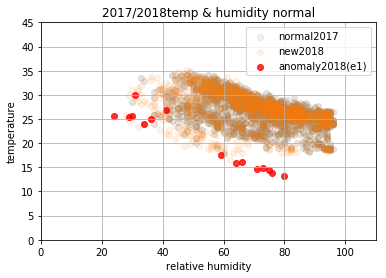

In [258]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.1)
plt.scatter(X_new[anomaly_idx_e1, 0], X_new[anomaly_idx_e1, 1], alpha=0.8,c='red')
plt.title("2017/2018temp & humidity normal")

plt.grid()
plt.xlim([0, 110])
plt.ylim([0, 45])
plt.legend(['normal2017','new2018','anomaly2018(e1)'])
plt.xlabel("relative humidity")
plt.ylabel("temperature")

plt.show()

## ÂçäÂæÑ epsilon = 2

In [259]:
# Ê≠£Â∏∏
from sklearn.neighbors import KNeighborsClassifier

k = 3 # ËøëÂÇçÁÇπ„ÅÆÂÄãÊï∞
epsilon_th = 2 # ÈñæÂÄ§(ÂçäÂæÑ)

X= df7nw_cut[["relative_humidity","temp"]].values

kneigh = KNeighborsClassifier(n_neighbors=k)
kneigh.fit(X, y) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [260]:
#Âà§ÂÆö

j = 0
anomaly_idx_e2=[]
dist, ind = kneigh.kneighbors(X_new)

for d in dist:
    j = j + 1
    r = np.max(d)
        
    if r > epsilon_th:
        anomaly_idx_e2.append(j)
        print("Anomaly No = ", j, " / Dist to Neigh = ",d)
        if j >= X_new.shape[0]-1:
            break
    else:
        pass

Anomaly No =  134  / Dist to Neigh =  [1.08 1.4  2.06]
Anomaly No =  136  / Dist to Neigh =  [0.   1.41 2.09]
Anomaly No =  156  / Dist to Neigh =  [1.35 1.5  4.21]
Anomaly No =  157  / Dist to Neigh =  [2.02 2.69 3.01]
Anomaly No =  158  / Dist to Neigh =  [2.42 2.97 3.77]
Anomaly No =  159  / Dist to Neigh =  [2.15 3.01 3.16]
Anomaly No =  160  / Dist to Neigh =  [0.   1.17 4.88]
Anomaly No =  161  / Dist to Neigh =  [0.   1.17 3.72]
Anomaly No =  1478  / Dist to Neigh =  [1.8  2.06 2.28]
Anomaly No =  1479  / Dist to Neigh =  [0.9  2.15 2.5 ]
Anomaly No =  1492  / Dist to Neigh =  [1.   1.64 2.15]
Anomaly No =  1493  / Dist to Neigh =  [1.2  1.8  2.09]
Anomaly No =  1494  / Dist to Neigh =  [1.   1.64 2.15]
Anomaly No =  1499  / Dist to Neigh =  [0.2  1.   2.56]
Anomaly No =  1500  / Dist to Neigh =  [2.79 3.2  3.45]
Anomaly No =  1501  / Dist to Neigh =  [2.88 2.9  2.97]
Anomaly No =  1502  / Dist to Neigh =  [2.6  3.78 4.35]
Anomaly No =  1503  / Dist to Neigh =  [2.24 2.44 3.52]


In [261]:
len(anomaly_idx_e2)

110

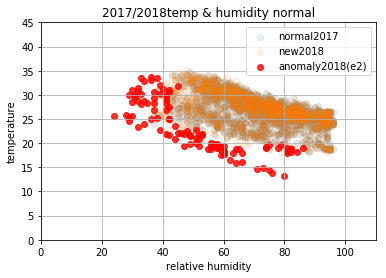

In [262]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.1)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.1)
plt.scatter(X_new[anomaly_idx_e2, 0], X_new[anomaly_idx_e2, 1], alpha=0.8,c='red')
plt.title("2017/2018temp & humidity normal")

plt.grid()
plt.xlim([0, 110])
plt.ylim([0, 45])
plt.legend(['normal2017','new2018','anomaly2018(e2)'])
plt.xlabel("relative humidity")
plt.ylabel("temperature")

plt.show()

ÂçäÂæÑ„Ååk=5„Åã„Çâk=2„Å´Ê∏õÂ∞ë„Åô„Çã„Å®„ÄÅÁï∞Â∏∏„Å®Ê§úÂá∫„Åï„Çå„Çã„Éá„Éº„Çø„ÅØ15ÂÄã„Åã„Çâ110ÂÄã„Å∏Â¢óÂä†

# Â±ÄÊâÄÂ§ñ„ÇåÂÄ§Â∫¶ÔºàLOFÔºâ
ÔºàÂÖ•Âäõ„ÅÆ„ÅøÔºÜÊôÇÁ≥ªÂàó‰ª•Â§ñÔºâ

Â±ÄÊâÄÂ§ñ„ÇåÂÄ§Â∫¶(local outliers factor, LOF)„ÅØ„ÄÅ ËøëÂÇçÊ≥ï„ÅÆËÄÉ„ÅàÊñπ„ÇíÊã°Âºµ„Åó„ÅüÊåáÊ®ô

LOF„Åã„ÇôÂ§ß„Åç„ÅÑ„Åª„Å®„ÇôÁï∞Â∏∏„Å¶„Çô„ÅÇ„Çã„Å®ËÄÉ„Åà„Çã

$\displaystyle a_{LOF}(\boldsymbol{x}')=\frac{1}{k}\sum_{\boldsymbol{x}\in N_k(\boldsymbol{x}')} \frac{d_k(\boldsymbol{x}')}{d_k(\boldsymbol{x})}$  
$\boldsymbol{x}'$ : Ë¶≥Ê∏¨ÁÇπ   
$a_{LOF}(\boldsymbol{x}')$ : Ë¶≥Ê∏¨ÁÇπ$\boldsymbol{x}'$„ÅÆÁï∞Â∏∏Â∫¶  
$d_k(\boldsymbol{x})$ : ËøëÂÇçÊúâÂäπË∑ùÈõ¢$l_k$„Çí$\boldsymbol{x}$„ÅÆÂë®„Çä„ÅÆ$k$ËøëÂÇç„Å´„Çè„Åü„ÇäÂπ≥Âùá„Åó„Åü„ÇÇ„ÅÆ  
$d_k(\boldsymbol{x}')$ : ËøëÂÇçÊúâÂäπË∑ùÈõ¢$l_k$„Çí$\boldsymbol{x'}$„ÅÆÂë®„Çä„ÅÆ$k$ËøëÂÇç„Å´„Çè„Åü„ÇäÂπ≥Âùá„Åó„Åü„ÇÇ„ÅÆ  


$d_k(\boldsymbol{x})$„Åä„Çà„Å≥$d_k(\boldsymbol{x}')$„ÅØ„ÄÅÊ¨°„ÅÆ„Çà„ÅÜ„Å´ÂÆöÁæ©„Åï„Çå„Çã    
„Åì„Åì„Åß„ÅØ„ÄÅ$\boldsymbol{x}$„Åæ„Åü„ÅØ$\boldsymbol{x}'$„Çí$\boldsymbol{u}$„Å®„ÅÑ„ÅÜË®òÂè∑„ÅßË°®Áèæ„Åô„Çã  
$\displaystyle d_k(\boldsymbol{u})=\frac{1}{k}\sum_{\boldsymbol{u}' \in N_k(\boldsymbol{u})}l_k(\boldsymbol{u}\longrightarrow \boldsymbol{u}')$  
  

$ l_k(\boldsymbol{u}\longrightarrow \boldsymbol{u}') \equiv \
  \left\{
    \begin{array}{l}
      \epsilon_k(\boldsymbol{u}') ~~~~~~~(\boldsymbol{u}\in N_k(\boldsymbol{u}')„Åã„Å§\boldsymbol{u}' \in N_k(\boldsymbol{u}))\\
      d(\boldsymbol{u}, \boldsymbol{u}')~ ~~~ (‰∏äË®ò‰ª•Â§ñ)
    \end{array}
  \right.
$

$d(\boldsymbol{u}, \boldsymbol{u}') $: „É¶„Éº„ÇØ„É™„ÉÉ„ÉâË∑ùÈõ¢„Å™„Å© 
      
$ l_k(\boldsymbol{u}\longrightarrow \boldsymbol{u}')$ : $\boldsymbol{u}$„Åã„Çâ$\boldsymbol{u}'$„Å∏„ÅÆËøëÂÇçÊúâÂäπË∑ùÈõ¢  

In [263]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [264]:
def func_lof(X, k):
    clf = LocalOutlierFactor(n_neighbors=k)
    y_pred = clf.fit_predict(X)
    X_scores = clf.negative_outlier_factor_
    lof = -1 * clf.negative_outlier_factor_
    #   print("lof=%s"%lof)
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(X_new[:, 0], X_new[:, 1], color='k', s=3., label='Data points')

    # 0-1„Å´Ê≠£Ë¶èÂåñ
    radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

    plt.scatter(
        X_new[:, 0],
        X_new[:, 1],
        s=1000 * radius,
        edgecolors='r',
        facecolors='none',
        label='Outlier scores')
    plt.axis('tight')
    plt.xlim([0, 110])
    plt.ylim([0, 45])
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.show()

    plt.plot(lof, marker="o")
    plt.ylabel("LOF")
    plt.xlabel("data ID")
    plt.show()
    return lof

## k=10

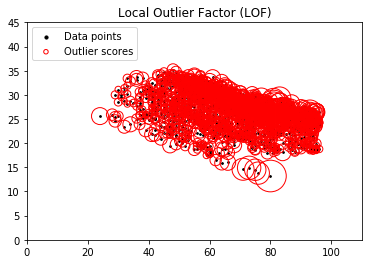

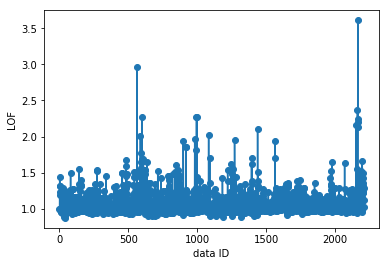

In [267]:
# X_new =  2018 _ all (emp & humidity) _ N = 2208 _ @nagoya

k = 10
X = np.r_[X_new]
lof = func_lof(X_new, k)

Á´Ø„ÅÆ„Éá„Éº„Çø„ÅÆLOF„Çπ„Ç≥„Ç¢„ÅØÁõ∏ÂØæÁöÑ„Å´Â§ß„Åç„ÅÑ„Åì„Å®„ÅåÁ¢∫Ë™ç„Åß„Åç„Çã

## k=1

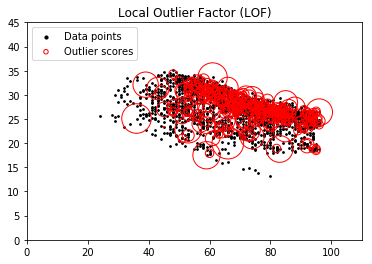

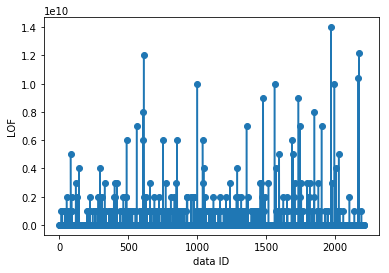

In [273]:
k = 1
X = np.r_[X_new]
lof = func_lof(X_new, k)

„Åü„Å†„Åó„ÄÅk=1„ÅÆÂ†¥ÂêàLOF„ÅåÁàÜÁô∫„Åó„Åü

# 1„ÇØ„É©„ÇπSVM
ÔºàÂÖ•Âäõ„ÅÆ„ÅøÔºÜÊôÇÁ≥ªÂàó‰ª•Â§ñÔºâ

‚Ä¢ 1„ÇØ„É©„Çπ„Çµ„Éõ„Çö„Éº„Éà„Éò„Çô„ÇØ„Éà„É´„Éû„Ç∑„É≥ Ôºö „Çµ„Éõ„Çö„Éº„Éà„Éò„Çô„ÇØ„Éà„É´„ÅÆËÄÉ„ÅàÊñπ„ÇíÊïôÂ∏´ „Å™„ÅóÂ≠¶Áøí„Å´ÈÅ©Âøú

‚Ä¢ Áï∞Â∏∏Ê§úÁü•„Å™„Å®„Çô„Å´Âà©Áî®„Åï„Çå„Çã

‚Ä¢ 1„ÇØ„É©„Çπ„Çµ„Éõ„Çö„Éº„Éà„Éò„Çô„ÇØ„Éà„É´„Éû„Ç∑„É≥„Å´„ÅØ„ÄÅÂ§ß„Åç„Åè„Çè„Åë„Å¶2„Å§„ÅÆÁ®ÆÈ°û

  ‚ë†„Çµ„Éõ„Çö„Éº„Éà„Éò„Çô„ÇØ„Éà„É´„ÉÜ„Çô„Éº„ÇøË®òËø∞Ê≥ï (support vector data desctiption, SVDD) 

    Ê≠£Â∏∏„ÉÜ„Çô„Éº„Çø„ÇíË∂ÖÁêÉ„Å¶„ÇôÂåÖ„Åø„ÄÅ„Åù„ÅÆÂçäÂæÑ„ÇíÊúÄÈÅ©Âåñ„Åô„ÇãÊñπÊ≥ï

  ‚ë°1„ÇØ„É©„ÇπŒΩ-SVM

    1„ÇØ„É©„ÇπŒΩ-SVM„ÅØ„ÄÅŒΩ-SVM„ÅÆËÄÉ„ÅàÊñπ„ÇíÊïôÂ∏´„Å™„ÅóÂ≠¶Áøí„Å´ÈÅ©Âøú„Åó„Åü„ÇÇ„ÅÆ

    ÂéüÁÇπ„ÇíÁï∞Â∏∏„ÉÜ„Çô„Éº„Çø„ÅÆ‰ª£Ë°®ÂÄ§„Å®„Åø„Å™„Åó„ÄÅ„Å™„Çã„Å∏„Çô„ÅèÂéüÁÇπ„Åã„ÇâÈõ¢„Çå„ÇãË≠òÂà•Â¢ÉÁïå„ÇíÊé¢„Åô

## 1„ÇØ„É©„Çπ nu-SVM

In [274]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import seaborn as sns

In [275]:
# df8nw = 2018 _ all (4data with wbgt) _ N = 2208 _ @nagoya
# X_new =  2018 _ all (humidity&temp) _ N = 2208 _ @nagoya

df= []
df = pd.DataFrame({'relative_humidity':X_new.T[0],'temp': X_new.T[1]})

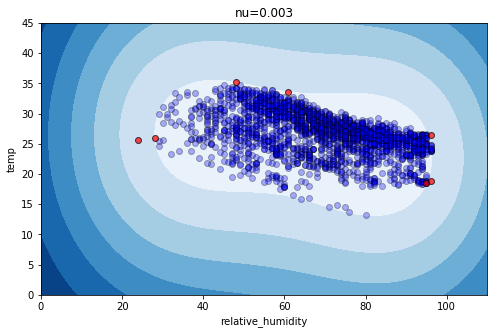

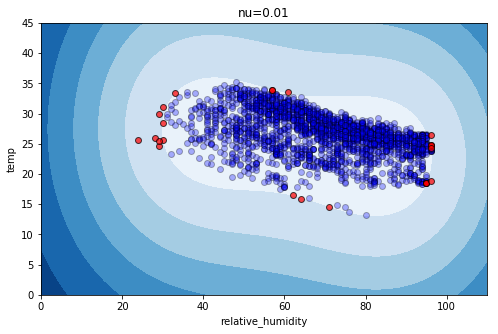

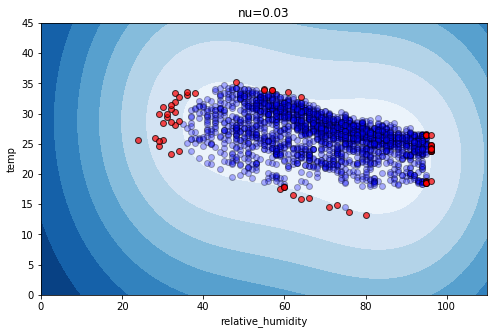

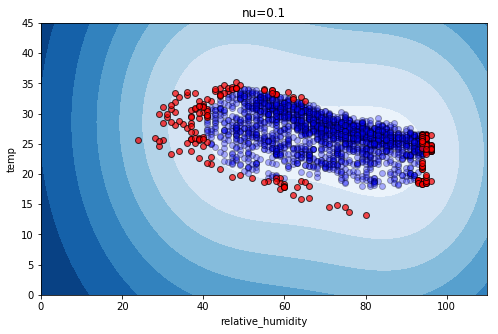

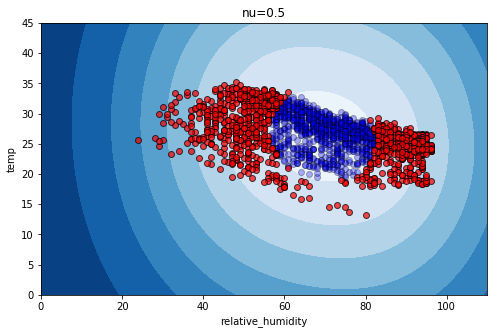

In [276]:

for nu in [0.003,0.01, 0.03,0.1, 0.5]:
    
    # 1„ÇØ„É©„Çπvu-SVM„ÅÆÂÆüË°å
    clf = svm.OneClassSVM(nu=nu, kernel="rbf", gamma=0.001)
    clf.fit(X_new)

    plt.figure(figsize=(8,5))
    xx, yy = np.meshgrid(np.linspace(0, 110, 100), np.linspace(0, 45, 100))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    
        # ÁµêÊûú„ÅÆÊèèÁîª
    df["y_pred"] = clf.predict(X_new)
    df_ = df[df["y_pred"]==1]
    plt.scatter(df_["relative_humidity"], df_["temp"], edgecolor='k',c="b",alpha=0.3)
    
    df_ =df[df["y_pred"]==-1]
    plt.scatter(df_["relative_humidity"], df_["temp"], edgecolor='k',c="r",alpha=0.7)
    
    plt.title("nu=%s"%nu)
    plt.xlim([0, 110])
    plt.ylim([0, 45])
    plt.xlabel("relative_humidity")
    plt.ylabel("temp")
    
    plt.show()

## SVDD

Ê≠£Â∏∏„ÉÜ„Çô„Éº„Çø„ÇíË∂ÖÁêÉ„Å¶„ÇôÂåÖ„Åø„ÄÅ„Åù„ÅÆÂçäÂæÑ„ÇíÊúÄÈÅ©Âåñ„Åô„ÇãÊñπÊ≥ï

usage
<pre>
    svm-train [options] training_set_file [model_file]
    options:
    
        -s svm_type : set type of SVM (default 0)  

                0 -- C-SVC		(multi-class classification)  
                1 -- nu-SVC		(multi-class classification)  
                2 -- one-class SVM  
                3 -- epsilon-SVR	(regression)  
                4 -- nu-SVR		(regression)  
                5 -- SVDD		(C should be between 1/num_instances and 1)  
                6 -- R^2: L1SVM  
                7 -- R^2: L2SVM  

        -t kernel_type  : set type of kernel function (default 2)  

                0 -- linear: u'*v  
                1 -- polynomial: (gamma*u'*v + coef0)^degree  
                2 -- radial basis function: exp(-gamma*|u-v|^2)  
                3 -- sigmoid: tanh(gamma*u'*v + coef0)  
                4 -- precomputed kernel (kernel values in training_set_file)  
        
        -d degree : set degree in kernel function (default 3)  
    
        -g gamma : set gamma in kernel function (default 1/num_features)  
    
        -r coef0 : set coef0 in kernel function (default 0)  

        -c cost : set the parameter C of -s 0, 3, 4, 5 and 7  
            (default 1, except 2/num_instances for -s 5)  

        -n nu : set the parameter nu of nu-SVC, one-class SVM, and nu-SVR
            (default 0.5)  

        -p epsilon : set the epsilon in loss function of epsilon-SVR  
            (default 0.1)  

        -m cachesize : set cache memory size in MB (default 100)  

        -e epsilon : set tolerance of termination criterion (default 0.001)  

        -h shrinking : whether to use the shrinking heuristics, 0 or 1 (default 1)  

        -b probability_estimates :   
            whether to train a SVC or SVR model for probability estimates, 0 or 1
            (default 0)  

        -wi weight : set the parameter C of class i to weight*C, for C-SVC   
            (default 1)  

        -v n: n-fold cross validation mode

        -q : quiet mode (no outputs)
</pre>

https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/#libsvm_for_svdd_and_finding_the_smallest_sphere_containing_all_data

In [277]:
import sys
sys.path.append('/Users/peasucrivafie/Documents/python/libsvm-3.22/python')
sys.path.append('/Users/yk131/iCloudDrive/Documents/python/libsvm-3.22/python')
from svm import *
from svmutil import *

In [278]:
libsvm

<CDLL '/Users/peasucrivafie/Documents/python/libsvm-3.22/python/../libsvm.so.2', handle 7f97e13903a0 at 0x1c21954a90>

In [279]:
#„ÄÄtest data

from svm import *
from svmutil import *

# For learning
t_label = [1, -1, 1, -1]
t_data = [[1.0, 2.0, 3.0], [3.0, 1.5, 1.0], [2.0, 3.0, 4.0], [0.5, 1.0, 1.5]]

problem = svm_problem(t_label, t_data)
parameter = svm_parameter('-s 5')
t = svm_train(problem, parameter)

optimization finished, 

#iter = 9
R^2 = 0.652208
obj = -0.326114, rho = -0.152218
nSV = 4, nBSV = 0„ÄÄ„ÄÄ

In [280]:
# For predict
p_label = [1, 1, -1, -1]
p_data = [[0.3, 0.9, 1.2], [2.0, 3.0, 4.5], [3.0, 1.0, 0.3], [1.0, 0.5, 0.25]]
result = svm_predict(p_label, p_data, t)

for r in result:
    print(r)

Accuracy = 50% (2/4) (classification)
[-1.0, -1.0, -1.0, -1.0]
(50.0, 2.0, nan)
[[0.0798614684716501], [0.09305866854825989], [0.1705116804259582], [0.31939999324071633]]


In [281]:
X= df7nw_cut[["relative_humidity","temp"]].values
y=[-1]*1891

X_=X.tolist()

In [282]:
# For learning

prob=svm_problem(y,X_)
parameter = svm_parameter('-s 5')  # SVDD ,d=3, rbf
t = svm_train(prob, parameter)

optimization finished, 

#iter = 387
R^2 = 0.991770
obj = -0.495831, rho = -0.491716
nSV = 329, nBSV = 0

In [283]:
# For predict
Xp = [[100,30],[50,10]]
yp = [1,-1]

In [285]:
result = svm_predict(yp, Xp, t)

Accuracy = 50% (1/2) (classification)


SVDD„ÅÆ  
+ Ê≠£Â∏∏„Éá„Éº„Çø„ÄÅË∂ÖÁêÉ„ÄÅ„Çµ„Éù„Éº„Éà„Éô„ÇØ„Éà„É´„ÅÆÂèØË¶ñÂåñ
+ ÊâãÊ≥ï„ÅÆË©ï‰æ°  
„Çí„ÇÑ„Çä„Åü„ÅÑ„Åå„ÄÇ„ÄÇ„ÄÇ

# ‰∏ªÊàêÂàÜÂàÜÊûê
ÔºàÂÖ•Âäõ„ÅÆ„ÅøÔºÜÊôÇÁ≥ªÂàó‰ª•Â§ñÔºâ

‚Ä¢ ÂÖÉ„ÅÆÂ§âÊï∞„Å´Èáç„Åø„Çí„Åã„Åë„ÅüÊñ∞„Åó„ÅÑÂêàÊàêÂ§âÊï∞(‰∏ªÊàêÂàÜ)„Å´ „Çà„Å£„Å¶„ÄÅÊ¨°ÂÖÉËª∏„ÇíÊ∏õ„Çâ„ÅôÊâãÊ≥ï

‚Ä¢ „ÉÜ„Çô„Éº„Çø„ÅÆÊ¨°ÂÖÉÂâäÊ∏õ„ÇÑ„ÄÅ„ÉÜ„Çô„Éº„Çø„ÅÆÁâπÊÄß„ÇíÊäΩÂá∫„Åô„Çã„ÅÆ„Å´ÂΩπÁ´ã„Å§

‚Ä¢ Â§öÊ¨°ÂÖÉ„ÉÜ„Çô„Éº„Çø„Çí‰ΩéÊ¨°ÂÖÉ(2Ê¨°ÂÖÉ„ÅÆ„ÇØ„Çô„É©„Éï„Å™„Å®„Çô)„Å¶„ÇôÂèØË¶ñÂåñ„Å¶„Çô„Åç„Çã

## Áï∞Â∏∏Â∫¶„ÅÆÂÆöÁæ©
$\displaystyle a({\boldsymbol x}')=||{\boldsymbol x}'_{(1)}||^2=||{\boldsymbol x}' - {\boldsymbol x}'_{(2)}||^2$  
${\boldsymbol x}'_{(2)}=U_m{U_m}^{T}{\boldsymbol x}'$  

${\boldsymbol x}'$ : Áï∞Â∏∏Â∫¶„ÇíÁÆóÂá∫„Åó„Åü„ÅÑÁÇπ  
${\boldsymbol x}'_{(1)}$ : Ê≠£Â∏∏ÈÉ®ÂàÜÁ©∫Èñì„Åã„Çâ„ÅØ„ÅøÂá∫„ÇãÊàêÂàÜ  
${\boldsymbol x}'_{(2)}$ : Ê≠£Â∏∏ÈÉ®ÂàÜÁ©∫Èñì„ÅÆÊàêÂàÜ  
$U_m$ : ‰∏ªÊàêÂàÜ„Éô„ÇØ„Éà„É´„ÇíÂàóÊñπÂêë„Å´‰∏¶„Åπ„ÅüË°åÂàó  
$m$ : Êé°Áî®„Åó„Åü‰∏ªÊàêÂàÜ„Éô„ÇØ„Éà„É´„ÅÆÊú¨Êï∞

In [286]:
from sklearn.decomposition import PCA

## data 2017w_all (4data with wbgt)_ @all pref

In [287]:
df2017 = pd.read_excel('data/hot/zenkoku2017.xlsx', sheet_name='Sheet1')

ta = df2017["temp"]
ws = df2017["wind_speed"]
sr = df2017["solar_radiation"]
rh = df2017["relative_humidity"]

wbgt = 0.735 * ta + 0.0374 * rh + 0.00292 * ta * rh + 7.619 * sr - 4.557 * sr**2 - 0.0572 * ws - 4.064
wbgt = pd.DataFrame(wbgt, columns=["wbgt"])
df2017w = pd.concat([df2017, wbgt], axis=1)

In [288]:
# place,time,nan „ÇíÈô§Âéª
df2017_5w = df2017w.drop(["place","time"],axis=1)
df2017_5w=df2017_5w.dropna()

In [289]:
df2017_5w.describe()

temp    wind_speed  solar_radiation  relative_humidity  \
count  74996.000000  74996.000000     74996.000000       74996.000000   
mean      25.594229      2.653202         0.690898          76.035335   
std        4.173223      1.696671         0.970908          14.212921   
min        4.900000      0.000000         0.000000          22.000000   
25%       22.800000      1.400000         0.000000          66.000000   
50%       25.900000      2.300000         0.100000          77.000000   
75%       28.500000      3.500000         1.180000          87.000000   
max       37.000000     17.600000         3.920000         100.000000   

               wbgt  
count  74996.000000  
mean      21.832106  
std        5.998822  
min      -12.419997  
25%       19.460670  
50%       23.238733  
75%       25.814603  
max       32.451030

In [290]:
# Êï£Â∏ÉË°åÂàó„ÅÆÂõ∫ÊúâÂÄ§„ÇíË®àÁÆó„Åó„ÄÅÁ¥ØÁ©çÂØÑ‰∏éÂ∫¶„ÇíÁ¢∫Ë™ç

pca = PCA(n_components=5)
pca.fit(df2017_5w)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## plot principal component

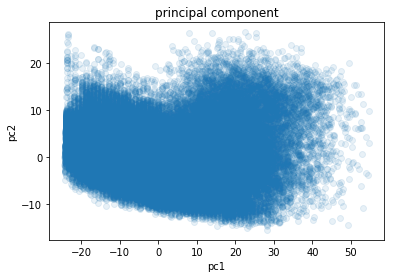

ÂêÑÊ¨°ÂÖÉ„ÅÆÂØÑ‰∏éÁéá: [0.82 0.14 0.04 0.01 0.  ]
Á¥ØÁ©çÂØÑ‰∏éÁéá: 0.9999999999999999


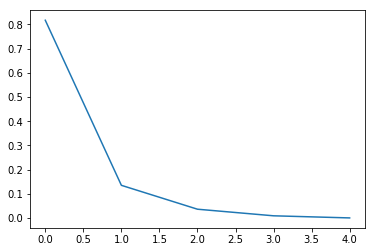

In [291]:
# ÂàÜÊûêÁµêÊûú„ÇíÂÖÉ„Å´„Éá„Éº„Çø„Çª„ÉÉ„Éà„Çí‰∏ªÊàêÂàÜ„Å´Â§âÊèõ„Åô„Çã

transformed = pca.fit_transform(df2017_5w)

# ‰∏ªÊàêÂàÜ„Çí„Éó„É≠„ÉÉ„Éà„Åô„Çã
plt.scatter(transformed[:, 0], transformed[:, 1], alpha=0.1)

plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# „Ç∞„É©„Éï„ÇíË°®Á§∫„Åô„Çã
plt.show()

# ‰∏ªÊàêÂàÜ„ÅÆÂØÑ‰∏éÁéá„ÇíÂá∫Âäõ„Åô„Çã
print('ÂêÑÊ¨°ÂÖÉ„ÅÆÂØÑ‰∏éÁéá: {0}'.format(pca.explained_variance_ratio_))
print('Á¥ØÁ©çÂØÑ‰∏éÁéá: {0}'.format(sum(pca.explained_variance_ratio_)))

plt.plot(pca.explained_variance_ratio_)

# „Ç∞„É©„Éï„ÇíË°®Á§∫„Åô„Çã
plt.show()

## plot temp & humidity

(0, 45)

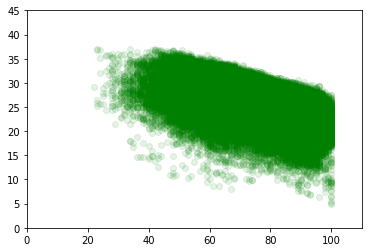

In [292]:
plt.scatter(df2017_5w['relative_humidity'],df2017_5w['temp'],alpha=0.1,color='g')
plt.xlim([0,110])
plt.ylim([0,45])

## ‰∏ªÊàêÂàÜÂàÜÊûê„ÇíÁî®„ÅÑ„Å¶„ÄÅÊñ∞„Åó„ÅÑÁ¨¨1‰∏ªÊàêÂàÜËª∏„Å®Á¨¨2‰∏ªÊàêÂàÜËª∏„Å´Â∞ÑÂΩ±

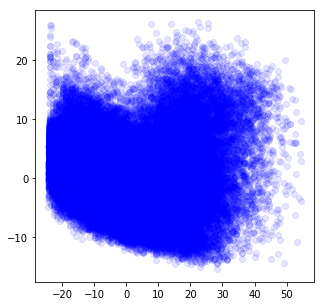

In [293]:
pca = PCA(n_components=2)
pca.fit(df2017_5w)

X_dash = pca.transform(df2017_5w)

plt.figure(figsize=(5, 5))
plt.scatter(X_dash[:, 0], X_dash[:, 1], marker="o", c="b", alpha=0.1)

# plt.xlim([-50, 70])
# plt.ylim([-20, 30])
plt.show()

## Ê≠£Â∏∏ÈÉ®ÂàÜÁ©∫Èñì„ÅÆÊàêÂàÜ„Åß„ÅÇ„Çã${\boldsymbol x}'_{(2)}$„ÇíÊ±Ç„ÇÅ„Çã

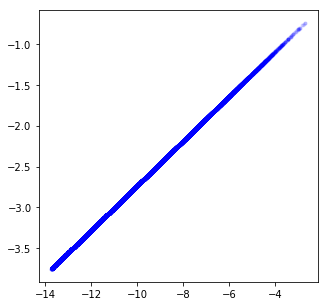

In [294]:
pca = PCA(n_components=1)
pca.fit(df2017_5w)

# ‰∏ªÊàêÂàÜ„Éô„ÇØ„Éà„É´
U = pca.components_.T

# Ê≠£Â∏∏ÈÉ®ÂàÜÁ©∫Èñì„ÅÆÊàêÂàÜ
X_2_n = np.dot(U, np.dot(U.T, df2017_5w.T)).T

plt.figure(figsize=(5,5))
plt.scatter(X_2_n[:,0], X_2_n[:,1], marker=".", c="b",alpha=0.1)

plt.show()

## Ê≠£Â∏∏ÈÉ®ÂàÜÁ©∫Èñì„Åã„Çâ„ÅØ„ÅøÂá∫„ÇãÊàêÂàÜ„Åß„ÅÇ„Çã${\boldsymbol x}'_{(1)}$„ÇíÊ±Ç„ÇÅ„Çã

In [295]:
X_1_n =  df2017_5w - X_2_n

## Áï∞Â∏∏Â∫¶

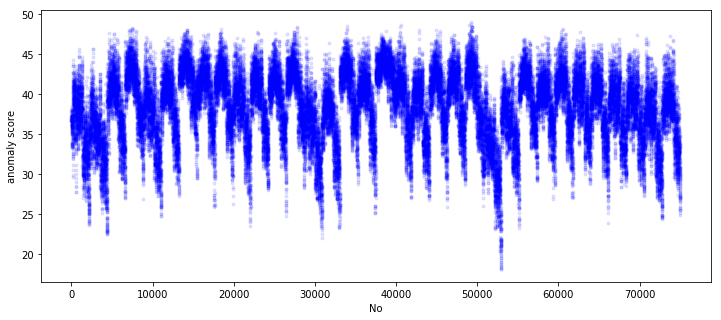

In [296]:
ascore_n = np.linalg.norm(X_1_n, axis=1)

plt.figure(figsize=(12, 5))
plt.plot(ascore_n, marker=".", c="b", ls="", alpha=0.1)

plt.ylabel("anomaly score")
plt.xlabel("No")
plt.show()

In [297]:
df2017.iloc[ascore_n.argsort()].head()

place                time  temp  wind_speed  solar_radiation  \
52885  sapporo  2017/9/26 14:00:00  23.6         5.5             2.20   
52886  sapporo  2017/9/26 15:00:00  23.0         5.4             1.50   
52887  sapporo  2017/9/26 16:00:00  22.3         3.0             1.02   
52888  sapporo  2017/9/26 17:00:00  21.2         1.3             0.28   
52883  sapporo  2017/9/26 12:00:00  22.7         2.8             2.72   

       relative_humidity  
52885               32.0  
52886               31.0  
52887               38.0  
52888               42.0  
52883               38.0

In [298]:
df2017.iloc[ascore_n.argsort()].tail()

place               time  temp  wind_speed  solar_radiation  \
33898  nagasaki  2017/8/2 11:00:00  32.8         2.9             2.98   
49040      saga  2017/7/20 9:00:00  28.5         1.5             0.57   
40569      nara  2017/8/4 10:00:00  28.3         3.8             1.45   
49256      saga  2017/7/29 9:00:00  29.6         0.7             1.67   
49280      saga  2017/7/30 9:00:00  30.2         1.8             1.71   

       relative_humidity  
33898               55.0  
49040               81.0  
40569               74.0  
49256               77.0  
49280               72.0

ÂåóÊµ∑ÈÅì„ÅåÁï∞Â∏∏„Å®Ê§úÂá∫

# ÂØÜÂ∫¶ÊØîÊé®ÂÆö
ÔºàÂÖ•Âäõ„ÅÆ„ÅøÔºÜÊôÇÁ≥ªÂàó‰ª•Â§ñÔºâ

uLSIF (unconstrained Least-Squares Importance Fitting) 

In [299]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import random
from numpy import linspace
from scipy.stats import norm
from densratio import densratio
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [300]:
# new data 2018 -> temp only

df2018 = pd.read_excel('data/hot/zenkoku2018.xlsx', sheet_name='Sheet1')
df8n=df2018[df2018['place']=='nagoya']
df8n_temp = df8n.temp[0:100]

In [322]:
# EMÊ≥ï„ÅßÂàÜÈõ¢„Åó„Åü nagoya 2017 data „ÇíÊ≠£Â∏∏„Éá„Éº„Çø„Å®„Åó„Å¶Êâ±„ÅÜ -> temp only

X = df7nw_cut[["relative_humidity", "temp"]].values
df_temp=pd.DataFrame(X.T[1])

/Users/peasucrivafie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


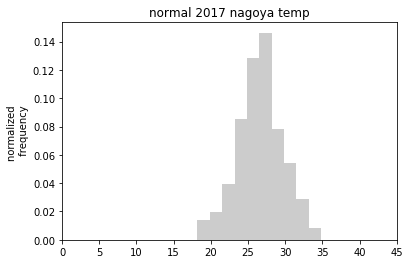

In [324]:
sns.distplot(df_temp, kde=False, norm_hist=True, bins=10, color="gray")
plt.title("normal 2017 nagoya temp")
plt.xlim([0, 45])
#plt.ylim([0, 0.5])
plt.ylabel("normalized \n frequency")
plt.show()

/Users/peasucrivafie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


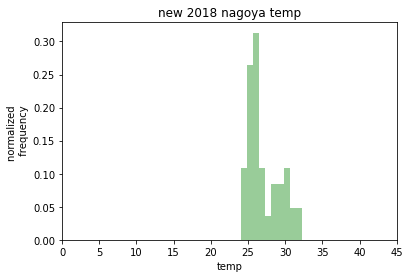

In [326]:
# Áï∞Â∏∏„ÇíÂê´„ÇÄÂèØËÉΩÊÄß„ÅÆ„ÅÇ„ÇãÊñ∞„Åó„ÅèË¶≥Ê∏¨„Åï„Çå„Åü„Éá„Éº„Çø 100 point

sns.distplot(df8n_temp, kde=False, norm_hist=True, bins=10,color="green")
plt.title("new 2018 nagoya temp")
plt.xlim([0,45])
plt.ylabel("normalized \n frequency")
plt.show()

In [327]:
x1 = np.array((df_temp - df_temp.mean(axis=0)) / df_temp.std(axis=0))
x2 = np.array((df8n_temp -df8n_temp.mean(axis=0)) / df8n_temp.std(axis=0))
x1 = x1[:1891]
x2 = x2[:1891]

/Users/peasucrivafie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


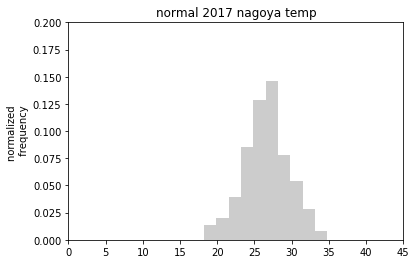

In [328]:
# Ê≠£Â∏∏„ÅÆ„Åø„ÅÆ„Éá„Éº„Çø

sns.distplot(df_temp, kde=False, norm_hist=True, bins=10, color="gray")
plt.title("normal 2017 nagoya temp")
plt.xlim([0, 45])
plt.ylim([0, 0.2])
# plt.xlabel("temp[deg]")
plt.ylabel("normalized \n frequency")
plt.show()

/Users/peasucrivafie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


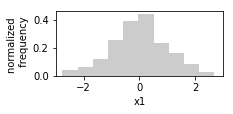

/Users/peasucrivafie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


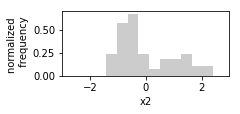

In [329]:
plt.figure(figsize=(3,1.2))
sns.distplot(x1, kde=False, norm_hist=True, bins=10,color="gray")
plt.xlabel("x1")
plt.xlim([-3,3])
plt.ylabel("normalized \n frequency")
plt.show()

plt.figure(figsize=(3,1.2))
sns.distplot(x2, kde=False, norm_hist=True, bins=10,color="gray")
plt.xlabel("x2")
plt.xlim([-3,3])
plt.ylabel("normalized \n frequency")
plt.show()

In [330]:
# ÂØÜÂ∫¶ÊØîÊé®ÂÆö„ÇíÂÆüË°å
result = densratio(x1,x2)
print(result)

################## Start uLSIF ##################
Searching optimal sigma and lambda...
  sigma = 0.001, lambda = 0.001, score = -14.836
Found optimal sigma = 0.001, lambda = 0.001.
Optimizing alpha...
End.
################## Finished uLSIF ###############
Method: uLSIF

Kernel Information:
  Kernel type: Gaussian RBF
  Number of kernels: 100
  Bandwidth(sigma): 0.001
  Centers: matrix([[-0.92],..

Kernel Weights(alpha):
  array([ 7.4 , 7.93, 5.29, 7.93, 4.76, 10.58, 3.7 , 4.76, 17.45,..

Regularization Parameter(lambda): 0.001

The Function to Estimate Density Ratio:
  compute_density_ratio(x)


In [331]:
display(len(x1))
display(len(x2))

1891

100

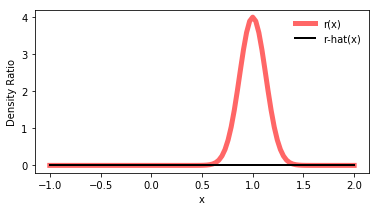

In [332]:
def true_density_ratio(x):
    """
    Ê≠£Ëß£„ÅÆÂØÜÂ∫¶ÊØî„ÇíÁÆóÂá∫„Åô„Çã
    """
    return norm.pdf(x, 1, 1./8) / norm.pdf(x, 1, 1./2)

def estimated_density_ratio(x):
    """
    Êé®ÂÆö„Åó„ÅüÂØÜÂ∫¶ÊØî„ÇíÂèñ„ÇäÂá∫„Åô
    """
    return result.compute_density_ratio(x)

x = linspace(-1, 2, 100)
plt.figure(figsize=(6,3))
plt.plot(x, true_density_ratio(x), "r-", lw=5, alpha=0.6, label="r(x)")
plt.plot(x, estimated_density_ratio(x), "k-", lw=2, label="r-hat(x)")
plt.legend(loc="best", frameon=False)
plt.xlabel("x")
plt.ylabel("Density Ratio")
plt.show()

‚ÜíÁµêÊûú?

# „Ç¢„Ç§„ÇΩ„É¨„Éº„Ç∑„Éß„É≥„Éï„Ç©„É¨„Çπ„Éà
ÔºàÂÖ•Âäõ„ÅÆ„ÅøÔºÜÊôÇÁ≥ªÂàó‰ª•Â§ñÔºâ

In [333]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

## „Éá„Éº„ÇøÁîüÊàê

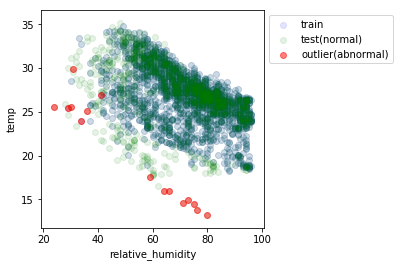

In [335]:
# rng = np.random.RandomState(42)

# Â≠¶ÁøíÁî®„Éá„Éº„Çø
X_train = df7nw_cut[["relative_humidity","temp"]].values

# „ÉÜ„Çπ„ÉàÁî®„Éá„Éº„Çø(Ê≠£Â∏∏)
X_test = X_new

# „ÉÜ„Çπ„ÉàÁî®„ÄÄ„Éá„Éº„Çø(Áï∞Â∏∏)
X_outliers = X_new[anomaly_idx_k1]

plt.figure(figsize=(4,4))
plt.scatter(X_train[:,0],X_train[:,1], c="b",alpha=0.1)
plt.scatter(X_test[:,0],X_test[:,1], c="g",alpha=0.1)
plt.scatter(X_outliers[:,0],X_outliers[:,1], c="r",alpha=0.5)

plt.xlabel("relative_humidity")
plt.ylabel("temp")
plt.legend(["train","test(normal)","outlier(abnormal)"], bbox_to_anchor=[1,1])

## Â≠¶Áøí

In [336]:
# fit the model
# rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=None)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

## ÁµêÊûú„ÅÆÊèèÁîª

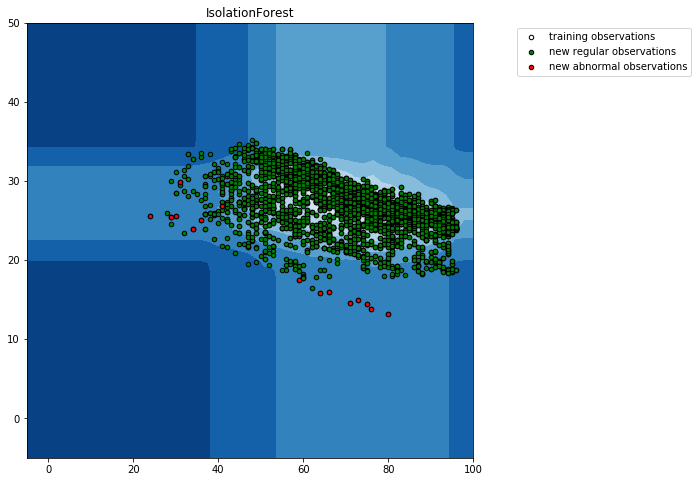

In [337]:
# Ê±∫ÂÆöÂ¢ÉÁïå„ÅÆÊèèÁîª
xx, yy = np.meshgrid(np.linspace(-5, 100, 50), np.linspace(-5, 50, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,8))
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

# Ë¶≥Ê∏¨ÁÇπ„ÅÆÊèèÁîª
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
          bbox_to_anchor=[1.5,1])
plt.show()

## ÂêÑÁÇπ„ÅÆÁï∞Â∏∏Â∫¶„ÇíÊ±Ç„ÇÅ„Çã

In [338]:
print('train : ', clf.decision_function(X_train).shape)
print('test : ', clf.decision_function(X_test).shape)
print('outliers : ', clf.decision_function(X_outliers).shape)

train :  (1891,)
test :  (2208,)
outliers :  (15,)


In [340]:
print('train : ', clf.decision_function(X_train))
print('test : ', clf.decision_function(X_test))
print('outliers : ', clf.decision_function(X_outliers))

train :  [-0.03 -0.02 -0.04 ... -0.11 -0.09 -0.1 ]
test :  [-0.03 -0.02 -0.04 ... -0.12 -0.12 -0.1 ]
outliers :  [-0.11 -0.08 -0.1  -0.09 -0.09 -0.1  -0.09 -0.09 -0.1  -0.11 -0.1  -0.09
 -0.09 -0.09 -0.1 ]
